# Importing the libraies

Importing libraries in for the  project is crucial for efficient development:

- **Time-saving**: Pre-implemented functions save time.
- **Optimized algorithms**: Efficient computation, especially with large datasets.
- **Community support**: Access to knowledge and resources.
- **Standardized interfaces**: Promotes code reusability.
- **Flexibility**: Offers a wide range of algorithms.
- **Ease of use**: User-friendly APIs and documentation.

In [1]:
import numpy as np 
import pandas as pd
import string

# Loading the dataset 

- **Size**: The dataset contains 37,500 rows and 75 columns.
- **Context**: Each column represents an acronym with 500 associated contexts.

[Download Dataset](https://conservancy.umn.edu/handle/11299/137703)

In [2]:
df = pd.read_excel("WSD Dataset.xlsx")

In [3]:
df.head()

,Abbreviation,Sense,Context
0,AB,abortion,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
1,AB,abortion,She is now bleeding quite heavily. Ultrasound ...
2,AB,abortion,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
3,AB,abortion,She had a pelvic ultrasound at Park Nicollet o...
4,AB,abortion,"On _%#MMDD2007#%_, normal anatomy with anterio..."


The dataset contains information about abbreviations along with their senses and associated contexts:

- **Abbreviations**: This column contains the abbreviations or acronyms.
- **Sense**: This column represents the sense or meaning of the corresponding abbreviation.
- **Context**: This column provides the context or usage examples associated with each abbreviation.

### Summary:
- **Number of Rows**: 37500 
- **Number of Columns**: 3
- **Data Types**: 
  - Abbreviations: String
  - Sense: String
  - Context: String

In [7]:
df["Abbreviations"] = df['Abbreviation']
df['LABEL'] = df["Sense"]
df['TEXT'] = df["Context"]

Explanation:

- **Abbreviations**: Assigning values from the "Abbreviation" column to a new column named "Abbreviations".
- **LABEL**: Assigning values from the "Sense" column to a new column named "LABEL".
- **TEXT**: Assigning values from the "Context" column to a new column named "TEXT".

In [8]:
del df['Abbreviation'], df['Sense'], df['Context']

Explanation:

The columns "Abbreviation", "Sense", and "Context" are deleted from the DataFrame (df).
Removing these columns may be necessary if they are no longer needed for the analysis or modeling tasks.

# Removing Punctuations for the TEXT 

In [9]:
def removePunctuation(df):
    return [str(t).translate(str.maketrans('','',string.punctuation)) for t in df['TEXT']]

df['TEXT'] = removePunctuation(df)

Explanation:

- **removePunctuation function**: This function takes a DataFrame (df) as input, iterates over the 'TEXT' column, and removes punctuation from each text entry using Python's translate function along with str.maketrans.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df) using list comprehension, replacing the original text entries with the cleaned ones.

# Creating Tokens from TEXT data 

In [10]:
def createTokens(df):
    return df['TEXT'].apply(lambda x: x.split(' '))

df['TEXT'] = createTokens(df)

Explanation:

- **createTokens function**: This function takes a DataFrame (df) as input and applies a lambda function to split each text entry in the 'TEXT' column into tokens using whitespace as the delimiter.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), replacing the original text entries with lists of tokens.

# Importing Spacy 

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

Explanation:

-**Importing spaCy**: The spacy library is imported to utilize its natural language processing capabilities.
- **Loading English Language Model**: The English language model ('en_core_web_sm') is loaded using the spacy.load() function and assigned to the variable nlp.

# Removing Stopwords from TEXT 

In [12]:
def removeStop(df):
    stopWords = spacy.lang.en.stop_words.STOP_WORDS
    [stopWords.remove(t) for t in df['Abbreviations'].str.lower() if t in stopWords]
    return df['TEXT'].apply(lambda x: [item for item in x if not item in stopWords])

df['TEXT']= removeStop(df)

Explanation:

- **removeStop function**: This function takes a DataFrame (df) as input and removes stopwords from each text entry in the 'TEXT' column. It utilizes the stop words list from the spaCy English language model.
- **Removing stopwords**: Stopwords are removed from each text entry, excluding any stop words that are part of the abbreviations listed in the 'Abbreviations' column.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), updating the column with the text data without stopwords.

# Converting TEXT to lowercase 

In [13]:
def tolower(df):
    return [' '.join([word.lower() for word in text]) for text in df['TEXT']]

df['TEXT'] = tolower(df)

Explanation:

- **tolower function**: This function takes a DataFrame (df) as input and converts each word in the text data to lowercase.
- **Converting to lowercase**: Each text entry is processed to convert all words to lowercase using list comprehension and the lower() method.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), updating the column with the text data converted to lowercase.

# Splitting TEXT into Tokens 

In [14]:
df['TEXT'] = df['TEXT'].str.split()

df.head()

,Abbreviations,LABEL,TEXT
0,AB,abortion,"[name, name, 29yearold, gravida, 3, para, 2002..."
1,AB,abortion,"[she, bleeding, heavily, ultrasound, morning, ..."
2,AB,abortion,"[allergies, heparin, imitrex, past, ob, histor..."
3,AB,abortion,"[she, pelvic, ultrasound, park, nicollet, mmdd..."
4,AB,abortion,"[on, mmdd2007, normal, anatomy, anterior, plac..."


Explanation:

The text data in the 'TEXT' column is split into tokens using the split() method.<br>
Each entry in the 'TEXT' column becomes a list of tokens, where each token represents a word from the original text.

In [16]:
df['TEXT'] = df['TEXT'].apply(lambda x: ' '.join(x))

# Importing the libraires and module for model building 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Explanation:

- **train_test_split**: Used for splitting the dataset into training and testing sets.
- **TfidfVectorizer**: Used for converting text data into TF-IDF vectors.
- **LogisticRegression, KNeighborsClassifier, svm, DecisionTreeClassifier, RandomForestClassifier**: Various classifiers available in scikit-learn for classification tasks.
- **accuracy_score**: Metric to evaluate the accuracy of the classifier predictions.<br>
These modules are essential for building and evaluating machine learning models.

# Spliting the data Into Training and Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['TEXT'], df['LABEL'], test_size=0.2, random_state=42)


Explanation:

- **X_train**: Training features, containing the text data.
- **X_test**: Testing features, containing the text data.
- **y_train**: Training labels, containing the corresponding labels.
- **y_test**: Testing labels, containing the corresponding labels.
- **train_test_split**: Function used to split the dataset into training and testing sets.
- **test_size**=0.2: Specifies the proportion of the dataset to include in the testing set (here, 20%).
- **random_state=42**: Provides a seed value for randomization, ensuring reproducibility.

# Converting Text Data to TF-IDF Vectors

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Explanation:

- **tfidf_vectorizer**: Object of TfidfVectorizer class initialized with maximum features set to 5000.
- **fit_transform**: Method used to fit the vectorizer to the training data and transform it into TF-IDF vectors.
- **transform**: Method used to transform the testing data into TF-IDF vectors using the same vectorizer fitted on the training data.<br>
TF-IDF vectorization converts text data into numerical vectors, where each feature represents the importance of a term in a document relative to the entire corpus.

# Logistic Regression 

In [20]:
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Explanation:

- **LogisticRegression**: Instantiates a Logistic Regression classifier.
- **fit**: Method used to train the Logistic Regression model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [21]:
y_pred1 = lr.predict(X_test_tfidf)

In [22]:
score1=accuracy_score(y_test,y_pred1)


In [23]:
score1

0.8416

# Support Vector Machine

In [24]:
from sklearn import svm

svm_classifier = svm.SVC()


In [25]:
svm_classifier.fit(X_train_tfidf,y_train)

SVC()

Explanation:

- **svm**: Module from scikit-learn containing Support Vector Machine algorithms.
- **SVC**: Instantiates a Support Vector Classification (SVC) model, which is used for classification tasks.
- **svm_classifier**: Variable holding the SVM classifier object.

In [26]:
y_pred2 = svm_classifier.predict(X_test_tfidf)

In [27]:
score2=accuracy_score(y_test,y_pred2)

In [28]:
score2

0.8486666666666667

# K-Nearest Neighbors

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)


KNeighborsClassifier()

Explanation:

- **KNeighborsClassifier**: Instantiates a K-Nearest Neighbors classifier.
- **fit**: Method used to train the KNN model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [30]:
y_pred3 = knn.predict(X_test_tfidf)

In [31]:
score3 = accuracy_score(y_test,y_pred3)

In [32]:
score3

0.21906666666666666

# Decision Tree

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

Explanation:

- **DecisionTreeClassifier**: Instantiates a Decision Tree classifier.
- **fit**: Method used to train the Decision Tree model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [34]:
y_pred4 = dt.predict(X_test_tfidf)

In [35]:
score4 = accuracy_score(y_test,y_pred4)

In [36]:
score4

0.8562666666666666

# Random Forest

In [37]:
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier()

Explanation:

- **RandomForestClassifier**: Instantiates Random Forest classifier.
- **fit**: Method used to train the Random Forest model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [38]:
y_pred5 = rf.predict(X_test_tfidf)

In [39]:
score5 = accuracy_score(y_test,y_pred5)

In [40]:
score5

0.8830666666666667

# Creating DataFrame for Model Evaluation 

In [41]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
            'ACC':[score1*100,
                   score2*100,
                   score3*100,
                   score4*100,
                   score5*100]})

Explanation:

- **pd.DataFrame**: Function used to create a DataFrame from a dictionary.
- **Models**: Column containing the names of the models.
- **ACC**: Column containing the accuracy scores of the models, multiplied by 100 to represent percentages.

In [42]:
final_data

,Models,ACC
0,LR,84.160000
1,SVC,84.866667
2,KNN,21.906667
3,DT,85.626667
4,RF,88.306667


# Visualizing Model Performance

<Axes: xlabel='Models', ylabel='ACC'>

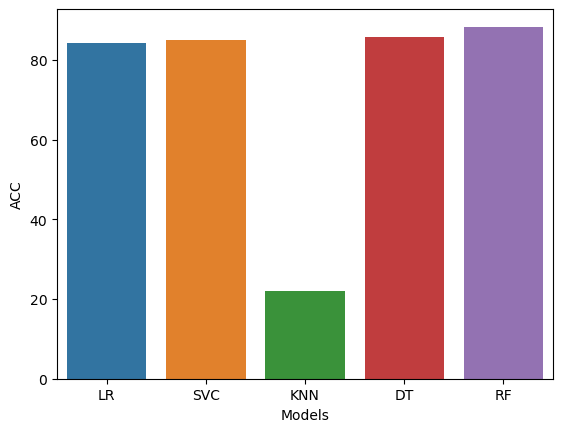

In [55]:
import seaborn as sns

sns.barplot(x=final_data['Models'],y=final_data['ACC'])

Explanation:

- **sns.barplot**: Function from the Seaborn library used to create a bar plot.
- **x**: Data for the x-axis, which is the 'Models' column from the final_data DataFrame.
- **y**: Data for the y-axis, which is the 'ACC' column from the final_data DataFrame.<br>
This bar plot provides a visual comparison of the accuracy scores of different models.

# Saving the model with the highest accuracy 

In [56]:
import joblib
joblib.dump(rf, "rf.pkl")

['rf.pkl']

# Prediction

###  Importing the libraries

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

### Preporcessing the  given Data

In [45]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)

    return processed_text

Explanation:

- **preprocess_text function**: This function takes a string of text as input and performs several preprocessing steps, including tokenization, removing non-alphanumeric tokens, converting tokens to lowercase, and removing stopwords.
- **nltk.tokenize.word_tokenize**: Function from the NLTK library used to tokenize the text.
- **nltk.corpus.stopwords**: Set of stopwords from the NLTK library used to remove stopwords from the text.

In [46]:
new_text = "2. Respiratory: The child was noted to have diffuse expiratory wheeze, harsh cough, did require oxygen supplementation for roughly 36 hours and gradually improved. He was suctioned for nasal congestion but was not treated with nebs. 3. Infectious Disease: NP swab for RSV was positive. Chest x-ray was negative. The child did not receive any antibiotics while hospitalized."

new_text_processed = preprocess_text(new_text)
new_text_vectorized = tfidf_vectorizer.transform([new_text_processed])


predicted_label = rf.predict(new_text_vectorized)[0]

predicted_label

'nasopharyngeal'

Explanation:

- **new_text**: The new text to be processed and classified.
- **preprocess_text**: The preprocess_text function is applied to the new text to preprocess it.
- **tfidf_vectorizer**: The TF-IDF vectorizer is then used to transform the preprocessed text into TF-IDF vectors.
- **rf**: The trained Random Forest classifier (rf) is used to predict the label for the new text based on the TF-IDF vectors.
- **predicted_label**: The predicted label for the new text.

# Thank You 


# Team : TECHSQUAD